# Relatório 1 - Leonardo Gargitter GRR20172145

In [3]:
from numpy import *
from matplotlib.pyplot import *
from scipy.signal import *
from scipy.signal import lfilter
from ipywidgets import interactive

clear = lambda: os.system('cls' if os.name == 'nt' else 'clear')

def nextpow2(x):
    res = ceil(log2(x))
    return res.astype('int')  # we want integer values only but ceil gives float

def rect(x):
    return where(abs(x) <= 0.5, 1, 0)


## a) Repetir o experimento 1 (Pulso triangular) utilizando o comando STEM para traçar o gráfico, criar um pequeno algoritmo que torne possível traçar a onda variando o número de pontos. Utilize a FFT e plote um gráfico do espectro de frequência e escreva, com suas próprias palavras, o que este gráfico representa.

Text(0.5, 1.0, 'Pulso triangular')

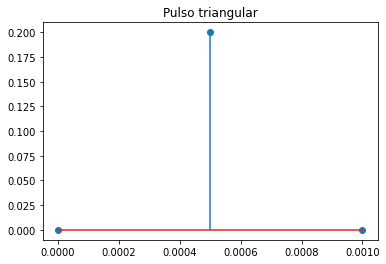

In [4]:
A = 0.2
f = 1000
T = 1 / f
tempo = arange(0, 1.0001 * T, T / 2)
y = zeros(3)
y[1] = A
stem(tempo, y)
title('Pulso triangular')



### Plotagem variando o número de pontos:
(Funcional no .ipynb) Usando o slider P variamos o valor desse parâmetro, assim o número de ciclos plotados é alterado. 

In [5]:
def f(P):
    figure(2)
    tempo_onda = arange(0, P * T * 1.001, T / 2)
    y = zeros(3 + ((P - 1) * 2))
    y[1::2] = A
    plot(tempo_onda, y)
    show()

interactive_plot = interactive(f, P=(1, 50))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(IntSlider(value=25, description='P', max=50, min=1), Output(layout=Layout(height='350px'…

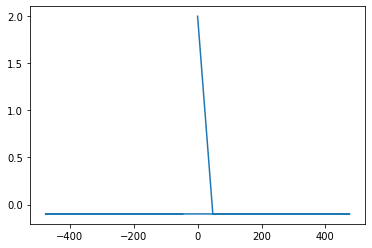

In [6]:
A = 0.2
f = 1000
T = 1 / f
P = 10
tempo = arange(0, P * T * 1.001, T / 2)
y = zeros(3 + ((P - 1) * 2))
y[1::2] = A

yf = fft.fft(y)
xf = fft.fftfreq(len(y),T)
plot(xf,yf)

Analisando o gráfico acima é notável que ele provalvelmente significa alguma coisa.

## b) Variar os parâmetros da onda quadrada e relatar as mudanças no espectro da frequência. Entregar em um arquivo do tipo ".m".

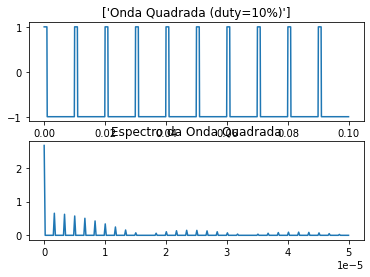

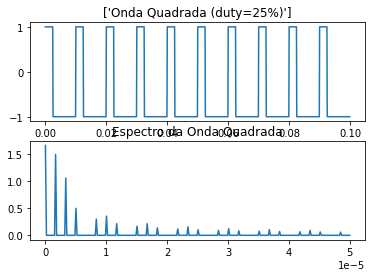

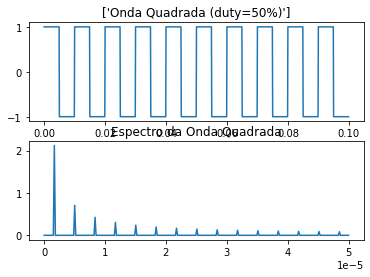

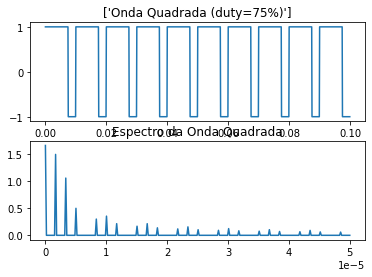

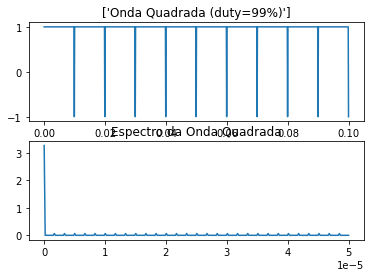

In [7]:
    vetor_r = [10, 25, 50, 75, 99]  # Porcentagem de T para To
    fc = 150  # Frequencia de corte do filtro
    f0 = 100  # Frequencia fundamental da onda quadrada
    fs = 100 * f0  # Frequencia de amostragem
    periodos = 10
    t = arange(0, 1 / f0 * periodos, 1 / fs)

    for duty in vetor_r:
        y = square(2 * np.pi * f0 * t, duty=duty / 100)
        subplot(2, 1, 1)
        # axis([0, 1 / f0 * periodos - 3, -3, 3])
        title(['Onda Quadrada (duty=' + str(duty) + '%)'])
        plot(t, y)
        N = 600
        yf = fft.fft(y)
        xf = linspace(0, 1.0 / (2.0 * fs), N // 2)

        subplot(2, 1, 2)
        plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
        title('Espectro da Onda Quadrada')
        # axis([-4 * (1 / (duty * 600000)) * f0, 4 * (1 / (duty * 600000)) * f0, 0, max(2 / N * abs(yf)) * 1.2])
        show()

## c) Testar a convolução no tempo e frequência entre a onda quadrada de duração 3 e uma exponencial decrescente de taxa de decaimento 10. Entregar um arquivo .pdf com a função "Publish" e todas as alterações necessária

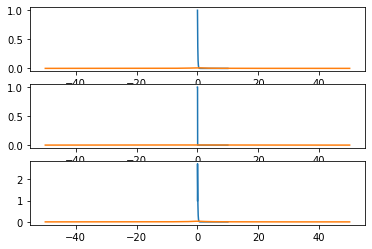

In [19]:
T = 10
fs = 100
tempo = arange(0, T, 1 / fs)
if mod(len(tempo), 2) == 0:
    tempo = tempo[0: len(tempo) - 1]

signal_1 = exp(-10. * tempo)
signal_2 = zeros(len(tempo))
signal_2[0:3]=1

output = np.convolve(signal_1, signal_2)
output = output[0:len(tempo)]

figure()
subplot(3, 1, 1)
plot(tempo, signal_1)
subplot(3, 1, 2)
plot(tempo, signal_2)
subplot(3, 1, 3)
plot(tempo, output)


fft_signal_1 = fft.fftshift(fft.fft(signal_1)) / len(tempo)
fft_signal_2 = fft.fftshift(fft.fft(signal_2)) / len(tempo)
fft_output = fft.fftshift(fft.fft(output)) / len(tempo)
freq = linspace(-fs / 2, fs / 2, len(tempo))

subplot(3, 1, 1)
plot(freq, abs(fft_signal_1))
subplot(3, 1, 2)
plot(freq, abs(fft_signal_2))
subplot(3, 1, 3)
plot(freq, abs(fft_output))

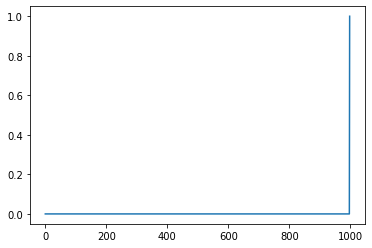

In [17]:
plot(signal_2)
